In [15]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import floatpy.readers.padeops_reader as por
%matplotlib inline
%config InlineBackend.figure_format = 'png'

fs = 12
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc07/rr8/256x192x128/'
filename_prefix = directory + 'TKEBudget_'
savefig = False
output_prefix = directory+'TKEBudget_'
zslice = 0

reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(True,False,True))
x, y, z = reader.readCoordinates()
ymin, ymax = y[0,0,0], y[-1,-1,-1]

steps = sorted(reader.steps)
print("Steps available: {}".format(max(steps)))

Steps available: 60


In [27]:
def plot_TKEBudget(reader, step, prefix, savename=''):
    reader.step = step

    namelist = ('rho_bar', 'tke', 'TKE_rate','dissipation', 'dissipation_num', \
                'p_dil_fluct', 'fluct_p_dil', 'production','baropycnal', 'u_tilde', 'u_pprime_bar')
    rho_bar, tke, ddt_tke, dissipation, num_dissipation, \
    p_dil, f_p_dil, production, baropycnal, u_tilde, u_pprime_bar \
    = reader.readData(namelist)
    
    variables = {r'$\partial \bar{\rho} \tilde{k} / \partial t$': ddt_tke,\
                 r'Dissipation': dissipation,\
                 r'Numerical dissipation': num_dissipation,\
                 r'Fluctuation pressure dilatation': f_p_dil,\
                 r'Production': production,\
                 r'Baropycnal': baropycnal}
    
    plt.figure(figsize=(8,4), dpi=100)
    for i, var in enumerate(variables):
        im = plt.plot(y[0,:,0],variables[var][0, :, 0],label=var)
    plt.xlim([-40,40])
    plt.xlabel(r'$\eta$', fontsize=fs)        
    plt.tick_params(labelsize=fs)
    plt.tight_layout()
    plt.legend(namelist)
    
    if savename:
        plt.savefig(savename, dpi=500)
        plt.close(fig)
        print "Saved plot to " + savename

Time: 460.0


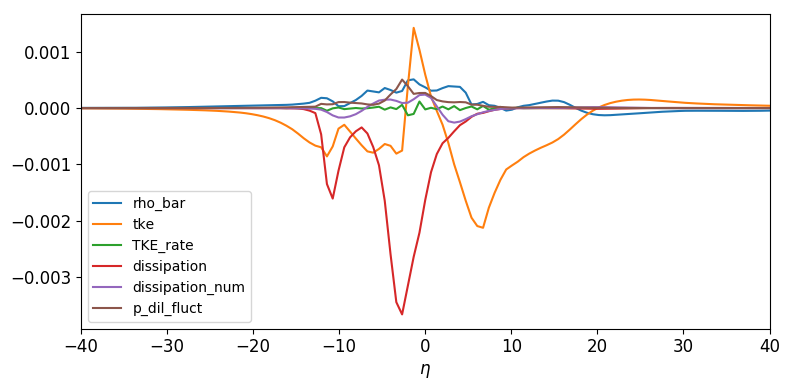

In [28]:
step = 55
reader.step = step
print("Time: {}".format(reader.time))
plot_TKEBudget(reader, 44, prefix=output_prefix, savename='')